In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as photo #读取图片

donggu = photo.imread('donggu.jpg')  #需要图片存放位置与运行文件处在同一个路径下
donggu.shape  #查看图片的形状
plt.imshow(donggu) # 显示图片  注意此处不需要加扩展名
plt.axis('off') # 不显示坐标轴
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
# k近邻算法通过距离计算分类问题
# 原则：少数服从多数，一点算一票。
# 二分类问题 计算结构如下
# 1、算距离   测试对象与训练集中每个对象计算距离
# 2、圈定范围(k的取值) ，寻找离测试对象近的前k项
# 3、分类别  查看类别k项类别，原则是一点算一票，选取票数最多的类别作为测试对象的类别

In [3]:
# KNN中的代码实现有两种
# 方式一、手写  根据两点间距离计算公式
# 方式二、调用sklearn库中的KNN算法包

# KNN实现方式一、手写

In [4]:
# 1、导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

已知数据的特征和标签

In [5]:
# 导入搜集到的红酒数据
rowdata={'颜色深度':[14.23,13.2,13.16,14.37,13.24,12.07,12.43,11.79,12.37,12.04],
          '酒精浓度':[5.64,4.38,5.68,4.80,4.32,2.76,3.94,3.00,2.12,2.6 ],
          '品种':[0,0,0,0,0,1,1,1,1,1]}

In [6]:
# 为便于查看数据将其转化成数据框
wine_data=pd.DataFrame(rowdata)
wine_data.head()  #查看前五行

,颜色深度,酒精浓度,品种
0,14.23,5.64,0
1,13.20,4.38,0
2,13.16,5.68,0
3,14.37,4.80,0
4,13.24,4.32,0


In [7]:
# 分别提取出特征、标签
# 提取特征
X=wine_data.iloc[:,:-1]  #提取除最后一列之外的所有特征  
# 左包含右不包含，正方向来说最后一列的索引号为-1 ，刚好除了最后一列其他都取出
X.head()

,颜色深度,酒精浓度
0,14.23,5.64
1,13.20,4.38
2,13.16,5.68
3,14.37,4.80
4,13.24,4.32


In [8]:
# 提取标签
y=wine_data.iloc[:,-1]  #提取除最后最后一列标签
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 品种, dtype: int64

In [9]:
# 为方便进行加减乘除计算，将特征、标签转成数组形式
X_array=np.array(X)
X_array

array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  4.8 ],
       [13.24,  4.32],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [10]:
y_array=np.array(y)
y_array

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

测试数据  新数据

In [11]:
# 新数据只有特征，需要根据已知数据训练出的模型，预测新数据的标签
new_wine_data=np.array([12.8,4.1])
new_wine_data

array([12.8,  4.1])

In [12]:
# 在建模前可以绘制图形，获取大概的信息

# 绘图前的准备工作
# 1、分别取出各类别的特征及标签  思路：通过bool索引再所以去的符合条件的数值
# 标签1及对应特征
y_array[y_array==1]
print('标签为1的：',y_array[y_array==1])
X_array[y_array==1]
print('标签为1的特征：')
print(X_array[y_array==1])
# 标签0及特征
y_array[y_array==0]
print('标签为0的：',y_array[y_array==0])
X_array[y_array==0]
print('标签为0的特征：')
print(X_array[y_array==0])

标签为1的： [1 1 1 1 1]
标签为1的特征：
[[12.07  2.76]
 [12.43  3.94]
 [11.79  3.  ]
 [12.37  2.12]
 [12.04  2.6 ]]
标签为0的： [0 0 0 0 0]
标签为0的特征：
[[14.23  5.64]
 [13.2   4.38]
 [13.16  5.68]
 [14.37  4.8 ]
 [13.24  4.32]]


酒精浓度的标签

In [13]:
X_array[y_array==0,0]  #表示提取标签为0的第0列特征，索引号从0开始

array([14.23, 13.2 , 13.16, 14.37, 13.24])

In [14]:
X_array[y_array==1,0]

array([12.07, 12.43, 11.79, 12.37, 12.04])

颜色深度的标签

In [15]:
X_array[y_array==0,1]

array([5.64, 4.38, 5.68, 4.8 , 4.32])

In [16]:
X_array[y_array==1,1]

array([2.76, 3.94, 3.  , 2.12, 2.6 ])

绘图前还要解决中文乱码问题

In [17]:
plt.rcParams['font.sans-serif']='SimHei' #window系统
# plt.rcParams['font.family']='Arial Unicode MS'  #苹果系统
plt.rcParams['axes.unicode_minus']=False

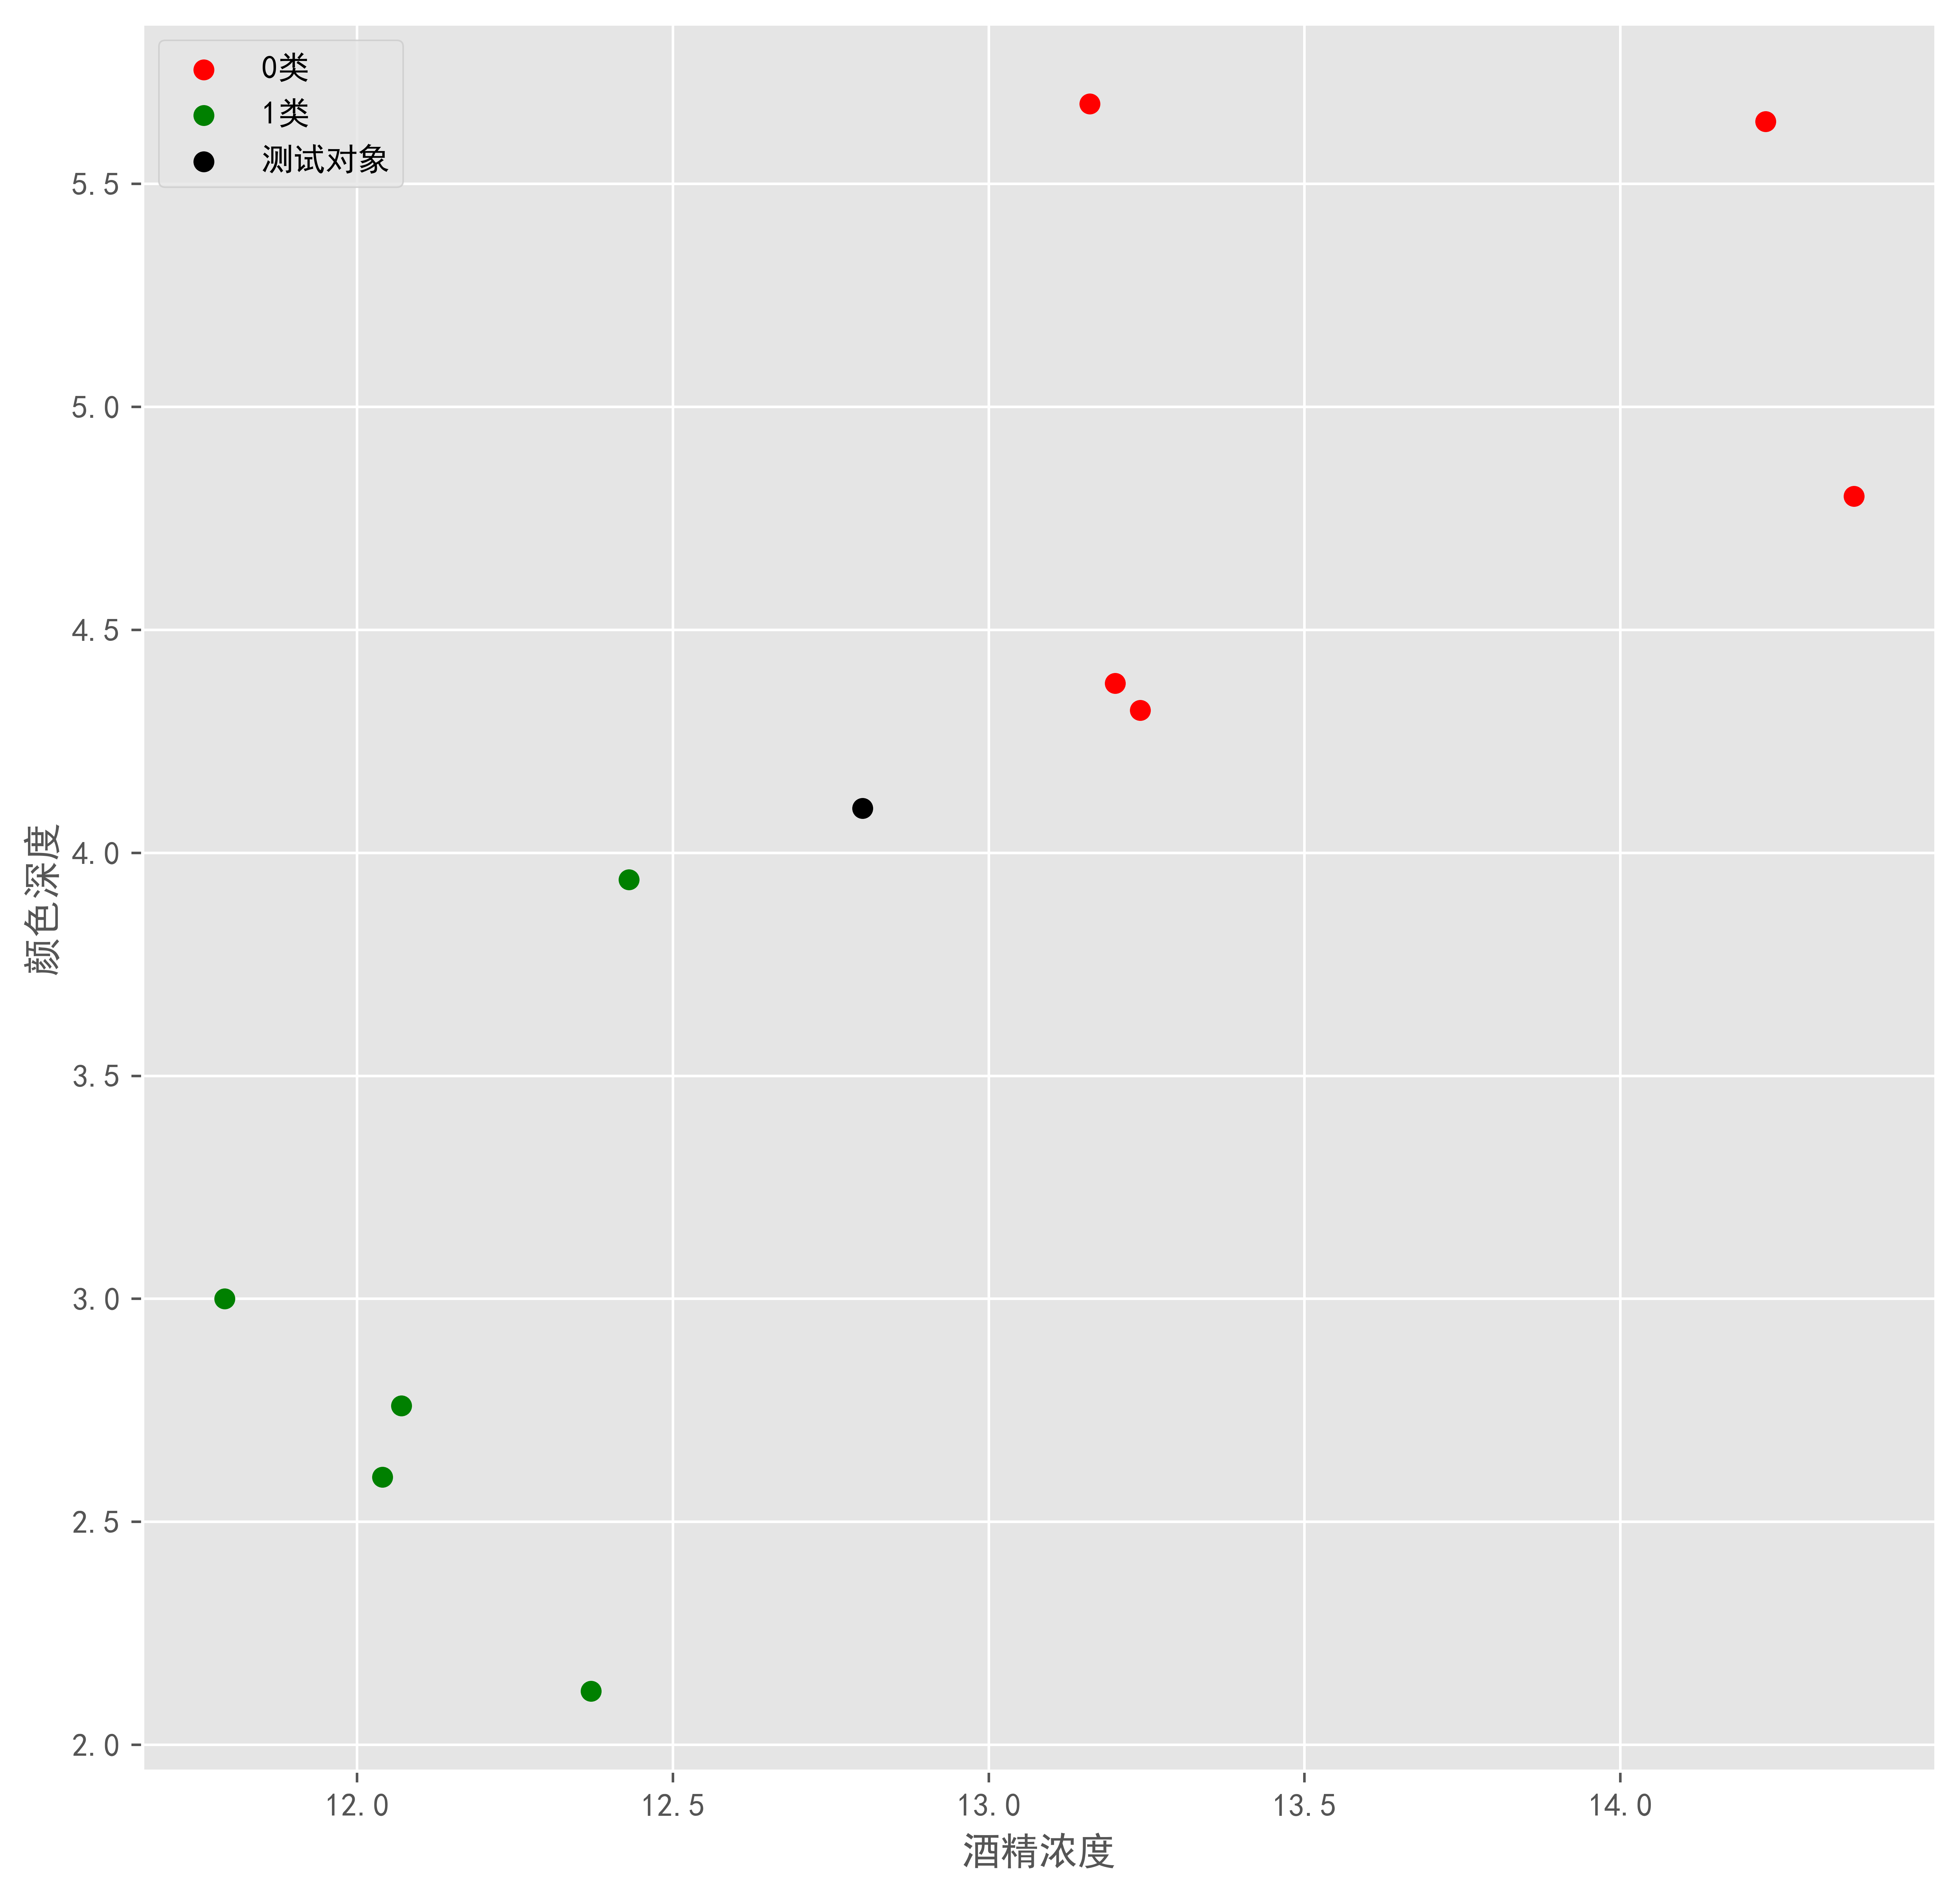

运行时间： 7.874450206756592


In [18]:
import time
from time import time
time0=time()
# 绘制散点图

# 设置使用风格
plt.style.use('ggplot')
# 准备画布
plt.figure(figsize=(10,10),dpi=720)  #dpi  分辨率
# 绘图
# 横坐标  酒精浓度  ；纵坐标  颜色深度
plt.scatter(X_array[y_array==0,0],X_array[y_array==0,1],color='red',label='0类')
plt.scatter(X_array[y_array==1,0],X_array[y_array==1,1],color='green',label='1类')
plt.scatter(new_wine_data[0],new_wine_data[1],color='black',label='测试对象')

plt.xlabel('酒精浓度')
plt.ylabel('颜色深度')
plt.legend(loc='upper left'); #图例的位置
# pltlegend(loc='lower right')
# plt.savefig('红酒样本.jpg')  # jpg格式     ；将绘制的图片保存到与代码相同的工作路径下
# plt.savefig('红酒样本.png')  #png格式
plt.show()
print('运行时间：',time()-time0)

根据上述的散点图可以看出离测试对象较近的3个点中，0类的2个、1类的1个，大概得出测试对象的标签可能为0  这些只是肉眼观测，需要运用数据进行实证

#### 代码手写实现KNN的整个流程

In [19]:
# 导入数据
# 1、算距离
# 2、圈定范围  人为设置k值，找近邻
# 3、进行分类

###### 1、算距离

In [20]:
from math import sqrt #从math库中调用sqrt

In [21]:
# 距离计算公式 
# 方式一
d=[sqrt(np.sum((x_array-new_wine_data)**2)) for x_array in X_array]  #列表推导式
d

[2.101547049199708,
 0.4882622246293471,
 1.6204937519163718,
 1.7189822570346662,
 0.49193495504995355,
 1.5259423318068084,
 0.4031128874149283,
 1.4933519344079622,
 2.026153992173349,
 1.6815469068687918]

In [22]:
# 方式二
d=[]
for i in range(10):
    d0=sqrt(np.sum((X_array[i]-new_wine_data)**2))
    d.append(d0)
print(d)


[2.101547049199708, 0.4882622246293471, 1.6204937519163718, 1.7189822570346662, 0.49193495504995355, 1.5259423318068084, 0.4031128874149283, 1.4933519344079622, 2.026153992173349, 1.6815469068687918]


##### 2、找近邻

    2.1、排序

In [23]:
# 排序
sort_list=np.sort(d)
sort_list
# 此排序将d的顺序打乱，获得对应的标签信息
# 不见用此做法

array([0.40311289, 0.48826222, 0.49193496, 1.49335193, 1.52594233,
       1.62049375, 1.68154691, 1.71898226, 2.02615399, 2.10154705])

In [24]:
# 正确的做法是运用argsort，获得按数值排序后的数据之前的索引号
# 运用此索引号获取对应的标签

In [25]:
sort_list=np.argsort(d)
sort_list

array([6, 1, 4, 7, 5, 2, 9, 3, 8, 0], dtype=int64)

In [26]:
y_array[sort_list]

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

    2.2、人为设定的k值，选取前k个并获取对应的标签信息

In [27]:
k=3
topk=y_array[sort_list][:k]
topk

array([1, 0, 0], dtype=int64)

In [28]:
k=3
topk=[y_array[i] for i in sort_list[:k]] #在排序索引中索取前k个，返回的是对应的标签
#列表推导式
topk

[1, 0, 0]

##### 3、做分类

In [29]:
# 一点算一票
# 统计各类别的个数

In [30]:
# 导入计数函数
from collections import Counter

In [31]:
votes=Counter(topk)
votes
# 人为可辩，但是机器不知，通过步步索引可以获得票数最多的标签

Counter({1: 1, 0: 2})

In [32]:
# 返回所有的结果
votes.most_common

<bound method Counter.most_common of Counter({0: 2, 1: 1})>

In [33]:
t1=votes.most_common(0)
print(t1)
t2=votes.most_common(1)
print(t2)
t3=votes.most_common(1)[0]
print(t3)
t4=votes.most_common(1)[0][0]
print(t4)
# 通过索引取得票数最多的标签，判定测试对象的标签是0

[]
[(0, 2)]
(0, 2)
0


In [34]:
# 将3步合并到一起的，形成完整的代码
# 定义函数，之后调用函数
def KNN(new_data,data):
    import numpy as np
    import pandas as pd
    from math import sqrt
    from collections import Counter
    
#     算距离
    d=[sqrt(np.sum((x-new_data)**2)) for x in np.array(data.iloc[:,0:2])]
#     找近邻
#     1、排序返索引、设k值
    sort_list=np.argsort(d)
    k=3
    result=[]
    topk=[data.iloc[:,-1][i] for i in sort_list[:k]]
#     做分类
    votes=Counter(topk)              
#     决策
    result.append(votes.most_common(1)[0][0])
    return result


In [35]:
# 调用函数
KNN(new_wine_data,wine_data)

[0]

手写KNN可以分开3个步骤，也可以定义函数并调用函数，但编写过程中环环相扣，联系紧密不容有错。

# KNN实现方式二、调用sklearn库中KNN算法

In [36]:
from sklearn.neighbors import KNeighborsClassifier  #k近邻算法

In [37]:
# 在sklearn库中的k近邻算法实现需要三步
# 一、实例化（赋值）
# 二、训练模型
# 三、预测
# 模型评估（预测的准确性、预测为每个类别的概率）

In [38]:
# 实例化
KNC=KNeighborsClassifier(n_neighbors=3) #k=3

# 训练模型
KNC=KNC.fit(X,y)
# 模型评估
pre=KNC.predict([[12.8,4.1]]) #特别注意此处必需是二维数组
pre

array([0], dtype=int64)

In [39]:
# 查看预测的准确性
# 需要新数据对应的真实标签
score=KNC.score([[12.8,4.1]],[0]) #[0]新数据的标签
score

1.0

In [40]:
# 预测概率  返回的是预测为每个类别的概率
pre_proba=KNC.predict_proba([[12.8,4.1]]) #必需是二维数组
pre_proba
# 预测为0类的标签约是0.67，1类约是0.33，最终得到结果为标签0

array([[0.66666667, 0.33333333]])

上述的k值是人为设定的，但k值取多少时会使得模型的训练效果较好，接下来运用学习曲线找寻最佳k值

### 选取sklearn库中的乳腺癌数据实现KNN并寻找最佳的k

In [41]:
# 方法一、绘制学习曲线寻找最佳k
'''划分训练集、测试集会对模型有一定的影响，运用交叉验证的n次结果的均值度量模型训练的效果，不失为一个好的方式'''
# 方法二、交叉验证

'划分训练集、测试集会对模型有一定的影响，运用交叉验证的n次结果的均值度量模型训练的效果，不失为一个好的方式'

# 一、 导入库及计算、乳腺癌数据

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.neighbors import KNeighborsClassifier as KNC #k近邻算法
from sklearn.datasets import load_breast_cancer   #乳腺癌数据集
# 划分数据集
from sklearn.model_selection import train_test_split as TTS 

In [43]:
cancer=load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

# 二、加载乳腺癌数据、划分出特征、标签

In [44]:
X=cancer.data
y=cancer.target

In [45]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [46]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [47]:
# 初步查看特征、标签
print('data：',X.shape)
print('target:',y.shape)

data： (569, 30)
target: (569,)


In [48]:
# 查看特征名称
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [49]:
# 查看标签名称
cancer.target_names
# 恶性 、良性

array(['malignant', 'benign'], dtype='<U9')

# 三、 划分数据集

In [50]:
# 传入数据、划分数据
Xtrain,Xtest,Ytrain,Ytest=TTS(X,y,test_size=0.3,random_state=420)

# 四、建模

In [51]:
from sklearn.neighbors import KNeighborsClassifier as KNC
# 实例化
KNC=KNC(n_neighbors=5)  #此处根据数据自身及经验设定k=5
# 训练模型
KNC=KNC.fit(Xtrain,Ytrain) #训练集训练数据
# 模型评估
score=KNC.score(Xtest,Ytest) #测试集检验训练效果
# 模型预测
pre=KNC.predict(Xtest)  #针对测试集特征预测标签
# 预测为每个标签的概率
pre_proba=KNC.predict_proba(Xtest)  

print('score:',score)
print('pre:',pre)

score: 0.9181286549707602
pre: [1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0
 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0
 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1]


######   找近邻（排序）

In [52]:
KNC.kneighbors(Xtest[[30,20],:], #选取索引号为30、20这两行的结果
               return_distance=True) #默认为True 返回索引号为30、20这两行数据数据按数值排序，但返回的是该数据为排序前的索引号

(array([[11.81126721, 14.5871725 , 18.94892695, 22.82904215, 27.42726062],
        [35.70015941, 42.02374599, 81.82147557, 83.06271326, 83.75943736]]),
 array([[211, 105,  77, 359,  64],
        [ 55, 164, 246, 206,  66]], dtype=int64))

In [53]:
'''KNC.kneighbors(Xtest,  #测试对象离2个标签样本的距离分别排序
               return_distance=True) #默认为True 返回索引号'''

'KNC.kneighbors(Xtest,  #测试对象离2个标签样本的距离分别排序\n               return_distance=True) #默认为True 返回索引号'

In [54]:
KNC.kneighbors(Xtest[[0,1],:],  
               return_distance=True) 

(array([[  9.14243254,  11.75330822,  16.33785928,  17.26590476,
          17.62380028],
        [ 37.39699911,  54.96743144,  79.62310647,  85.72803683,
         108.02951243]]), array([[ 49, 348,  19, 203, 129],
        [310, 167, 342, 224, 171]], dtype=int64))

# 五、调整模型，找寻最佳模型 
### 核心是找寻最佳的k值
### 5.1、方式一：绘制学习曲线

8 0.935672514619883


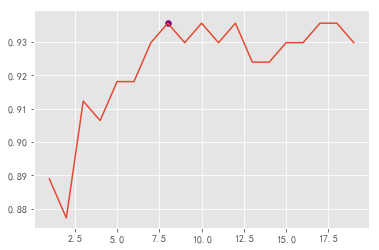

In [55]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
score=[]
krange=range(1,20)

for i in krange:
    KNC=KNeighborsClassifier(n_neighbors=i)
    KNC=KNC.fit(Xtrain,Ytrain)
    score.append(KNC.score(Xtest,Ytest))

# 画图
plt.plot(krange,score)
plt.scatter(krange[score.index(max(score))],max(score),color='purple')
print(krange[score.index(max(score))],max(score))
plt.show()

In [56]:
krange[score.index(max(score))]  #返回的是max(score)对应的k值

8

### 5.2、方式二：交叉验证+学习曲线  

In [57]:
'''绘制交叉验证思路:
设定折数n,即数据集均分成n份,每一份均有一次作为测试集剩余作为训练集,最终得到n个结果。
'''

'''绘制交叉验证+学习曲线：
横坐标是k值的范围,针对学习曲线来说线是模型训练效果,针对交叉验证来说线是n折交叉结果的均值'''

'绘制交叉验证+学习曲线：\n横坐标是k值的范围,针对学习曲线来说线是模型训练效果,针对交叉验证来说线是n折交叉结果的均值'

#### 5.2.1、绘制交叉验证 

13 0.933389765294344


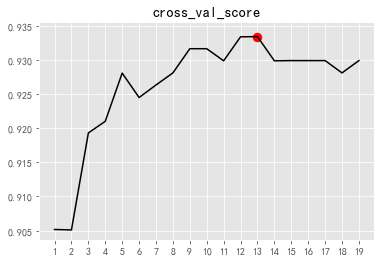

In [58]:
from sklearn.model_selection import cross_val_score  #交叉验证包
from sklearn.neighbors import KNeighborsClassifier
score=[]
krange=range(1,20)
for i in krange:
    KNC=KNeighborsClassifier(i)
    s_mean=cross_val_score(KNC,X,y,cv=5).mean()
    score.append(s_mean)
print(krange[score.index(max(score))],max(score))
    
# 画图
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(krange,score,color='black')
plt.scatter(krange[score.index(max(score))],max(score),color='red',s=80) #索引从0开始需要加1
plt.xticks(range(1,20))  #注意此处需要运用range 获取刻度
plt.title('cross_val_score');  # ;消除画图产生的文本信息


In [59]:
s_mean  #五折交叉验证的均值 ,该模型训练的平均效果

0.9298807233551367

In [60]:
s_var=cross_val_score(KNC,X,y,cv=5).var()
s_var #衡量模型是否稳定

0.0009498770430098547

#### 5.2.2、 绘制交叉验证+学习曲线

14
0.933389765294344


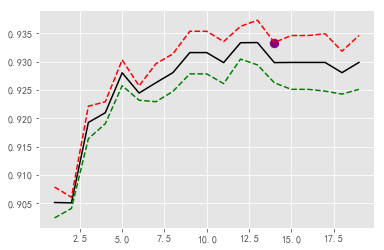

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

s_mean=[]
s_var=[]
krange=range(1,20)

for i in krange:
    KNC=KNeighborsClassifier(i)
    s=cross_val_score(KNC,X,y,cv=5)
    s_mean.append(s.mean())
    s_var.append(s.var())

# 画图
plt.plot(krange,s_mean,color='k')
plt.plot(krange,np.array(s_mean)+np.array(s_var)*5,#将方差扩大5倍便于观察
         c='red',linestyle='--')
plt.plot(krange,np.array(s_mean)-np.array(s_var)*5,
        c='green',linestyle='--')
plt.scatter(krange[score.index(max(score))]+1 #score.index的索引是从0开始的
            ,max(score),color='purple',s=80)

print(krange[score.index(max(score))]+1) 
print(max(score))

上述的流程存在一定的缺陷，在涉及算距离的模型要消除量纲对模型的影响。需注意，先划分数据集在消除量纲（归一化、标准化），不能提前将测试集数据信息让模型获知，否则会使模型训练效果不佳

#  归一化

方法一、分步实现归一化

In [62]:
Xtrain,Xtest,Ytrain,Ytest=TTS(X,y,test_size=0.3,random_state=420)

In [63]:
# 分步实现  可以应用于不同模型上，如对比数据在多个模型上训练的情况
# 归一化的包
from sklearn.preprocessing import MinMaxScaler as MMS
mms=MMS()

mms_train_=mms.fit(Xtrain) 
mms_test_=mms.fit(Xtest)

X_train_=mms_train_.transform(Xtrain)
X_test_=mms_test_.transform(Xtest)

方式二、一步实现  

In [64]:
# 应用于数据只运用到某一个模型的情况

In [65]:
from sklearn.preprocessing import MinMaxScaler as MMS
mms=MMS()
mms_train=mms.fit_transform(Xtrain)
mms_test=mms.fit_transform(Xtest)

######  标准化

In [66]:
# 分步实现
from sklearn.preprocessing import StandardScaler as SS

ss_train=SS().fit(Xtrain)
ss_test=SS().fit(Xtest)

ss_train_=ss_train.transform(Xtrain)
ss_test_=ss_test.transform(Xtest)

In [67]:
# 一步实现
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
ss_train=ss.fit_transform(Xtrain)
ss_test=ss.fit_transform(Xtest)

# 注意涉及距离的模型需要归一化、标准化后再建模型

此处对特征进行归一化处理

1、导入库、算法、数据

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# 导入数据
from sklearn.datasets import load_breast_cancer
# 导入算法
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2、 加载数据、划分特征与标签

In [69]:
breast=load_breast_cancer()
breast

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [70]:
# 划分特征、标签
X=breast.data
y=breast.target

In [71]:
X.shape

(569, 30)

In [72]:
y.shape

(569,)

In [78]:
X1=pd.DataFrame(X,columns=breast.feature_names)

3、划分数据集

In [81]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)

In [82]:
Xtrain.shape

(398, 30)

In [91]:
pd.DataFrame(Xtrain).describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
0,398.0,13.864394,3.325079,6.98100,11.602500,13.165000,15.430000,27.42000
1,398.0,19.220201,4.443278,9.71000,16.040000,18.700000,21.660000,39.28000
2,398.0,90.221683,22.947152,43.79000,74.332500,84.810000,102.475000,186.90000
3,398.0,627.907035,323.939214,143.50000,410.425000,537.100000,732.125000,2501.00000
4,398.0,0.096704,0.014259,0.05263,0.086135,0.096755,0.105250,0.16340
5,398.0,0.104455,0.054310,0.01938,0.063235,0.090385,0.131300,0.34540
6,398.0,0.087576,0.078516,0.00000,0.029053,0.059640,0.132250,0.42680
7,398.0,0.047677,0.037487,0.00000,0.019672,0.032770,0.074122,0.20120
8,398.0,0.181681,0.027164,0.10600,0.162850,0.179350,0.195850,0.29060
9,398.0,0.063232,0.007316,0.04996,0.058392,0.062005,0.066530,0.09744


In [83]:
Xtest.shape

(171, 30)

In [93]:
pd.DataFrame(Xtest).describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
0,171.0,14.739181,3.890504,7.72900,11.97000,13.78000,17.34500,28.1100
1,171.0,19.451287,3.957964,10.38000,16.82500,19.46000,21.95500,32.4700
2,171.0,96.035965,26.819404,47.98000,77.28500,88.52000,114.35000,188.5000
3,171.0,717.689474,403.799176,178.80000,442.15000,585.90000,938.40000,2499.0000
4,171.0,0.095561,0.013607,0.06429,0.08639,0.09373,0.10540,0.1371
5,171.0,0.104075,0.049304,0.02675,0.06720,0.09709,0.12795,0.2776
6,171.0,0.091647,0.082618,0.00000,0.03023,0.06726,0.12150,0.4264
7,171.0,0.051811,0.041676,0.00000,0.02095,0.03562,0.06945,0.1913
8,171.0,0.179954,0.028032,0.12150,0.16040,0.17790,0.19515,0.3040
9,171.0,0.061786,0.006330,0.05024,0.05671,0.06113,0.06557,0.0845


4、归一化

In [86]:
from sklearn.preprocessing import MinMaxScaler as MMS

In [88]:
mms=MMS()
Xtrain_mms=mms.fit_transform(Xtrain)
Xtest_mms=mms.fit_transform(Xtest)

In [94]:
pd.DataFrame(Xtrain_mms).describe().T.head()

,count,mean,std,min,25%,50%,75%,max
0,398.0,0.336777,0.162683,0.0,0.226112,0.302559,0.413376,1.0
1,398.0,0.321617,0.150263,0.0,0.214068,0.304024,0.404126,1.0
2,398.0,0.324448,0.160346,0.0,0.213420,0.286633,0.410069,1.0
3,398.0,0.205475,0.137408,0.0,0.113224,0.166957,0.249682,1.0
4,398.0,0.397886,0.128727,0.0,0.302474,0.398348,0.475038,1.0


In [95]:
pd.DataFrame(Xtest_mms).describe().T.head()

,count,mean,std,min,25%,50%,75%,max
0,171.0,0.343957,0.190889,0.0,0.208086,0.296894,0.471812,1.0
1,171.0,0.410651,0.179174,0.0,0.291761,0.411046,0.523993,1.0
2,171.0,0.341987,0.190858,0.0,0.208547,0.288500,0.472317,1.0
3,171.0,0.232260,0.174036,0.0,0.113503,0.175459,0.327386,1.0
4,171.0,0.429484,0.186883,0.0,0.303530,0.404340,0.564620,1.0


5、建模

In [99]:
knn_=KNeighborsClassifier()  #默认找前五个
knn_=knn_.fit(Xtrain_mms,Ytrain)
mms_score=knn_.score(Xtest_mms,Ytest)
mms_score

0.9766081871345029

In [101]:
# 未归一化处理时模型的训练效果
knn=KNeighborsClassifier()
knn=knn.fit(Xtrain,Ytrain)
score=knn.score(Xtest,Ytest)
score

0.9181286549707602

由此得知涉及计算距离类的模型标准化或归一化后会使得模型的训练效果有很好的提升